In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


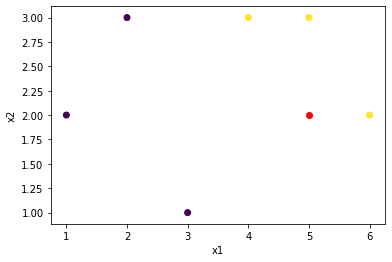

In [2]:
x_train = [[1.0, 2.0], [2.0, 3.0], [3.0, 1.0], [4.0, 3.0], [5.0, 3.0], [6.0, 2.0]]
y_train = [[0.0], [0.0], [0.0], [1.0], [1.0], [1.0]]

x_test = [[5.0, 2.0]]
y_test = [[1.0]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]
colors = [int(y[0] % 2) for y in y_train]
plt.scatter(x1, x2, c=colors, marker="o")
plt.scatter(x_test[0][0], x_test[0][1], c="red")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
W = tf.Variable(tf.zeros([2, 1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")


def logic(features):
    hypo = tf.sigmoid(tf.matmul(features, W) + b)
    return hypo

def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logic(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logic(features),features,labels)
    return tape.gradient(loss_value, [W,b])

    
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logic(features),features,labels)))
test_acc = accuracy_fn(logic(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))


Iter: 0, Loss: 0.6475
Iter: 100, Loss: 0.4135
Iter: 200, Loss: 0.3490
Iter: 300, Loss: 0.3009
Iter: 400, Loss: 0.2632
Iter: 500, Loss: 0.2333
Iter: 600, Loss: 0.2091
Iter: 700, Loss: 0.1893
Iter: 800, Loss: 0.1729
Iter: 900, Loss: 0.1591
Iter: 1000, Loss: 0.1473
Testset Accuracy: 1.0000
